**Dataset**

- Paper: 6 Papers
- Published in:
- Date: 2019
- Links: 
    - https://research.unsw.edu.au/projects/bot-iot-dataset
    - https://unsw-my.sharepoint.com/personal/z5131399_ad_unsw_edu_au/_layouts/15/onedrive.aspx

## Load Dataset

In [1]:
import pandas as pd

df_train = pd.read_csv('C:/Users/S4025371/OneDrive - RMIT University/Repositories/iot-llm/data/bot-iot/Bot-IoT_Dataset/Dataset/5%/10-best features/10-best Training-Testing split/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
df_test = pd.read_csv('C:/Users/S4025371/OneDrive - RMIT University/Repositories/iot-llm/data/bot-iot/Bot-IoT_Dataset/Dataset/5%/10-best features/10-best Training-Testing split/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')

In [3]:
# print total record count
print(len(df_train))
print(len(df_test))

2934817
733705


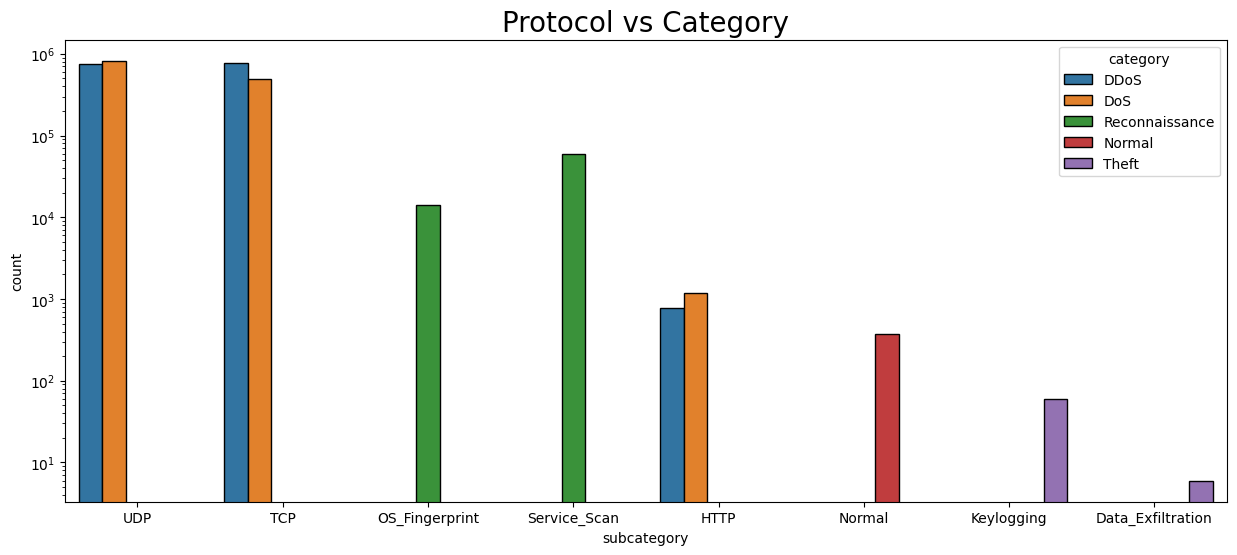

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='subcategory', hue='category', edgecolor='black', linewidth=1)
plt.yscale('log')
plt.title('Protocol vs Category', fontsize=20)
plt.show()

In [5]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Category', 'Protocol'), specs=[[{'type':'pie'}, {'type':'pie'}]])
fig.add_trace(go.Pie(labels=df['category'].value_counts().index, values=df['category'].value_counts().values, hole=0.3), row=1, col=1)
fig.add_trace(go.Pie(labels=df['subcategory'].value_counts().index, values=df['subcategory'].value_counts().values, hole=0.3), row=1, col=2)
fig.update_layout(title='Distribution of Data', title_x=0.45)
fig.show()


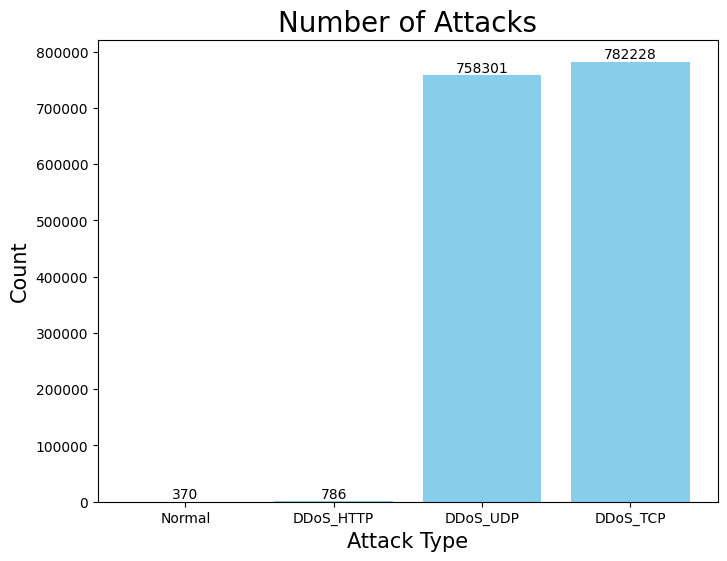

In [6]:
# Consider DDoS attacks of HTTP, UDP, and TCP
attack_types = ['Normal', 'DDoS_HTTP', 'DDoS_UDP', 'DDoS_TCP']
attack_counts = [len(df[(df['category'] == 'Normal') & (df['subcategory'] == 'Normal')]), 
                 len(df[(df['category'] == 'DDoS') & (df['subcategory'] == 'HTTP')]),
                 len(df[(df['category'] == 'DDoS') & (df['subcategory'] == 'UDP')]), 
                 len(df[(df['category'] == 'DDoS') & (df['subcategory'] == 'TCP')])]
plt.figure(figsize=(8, 6))
plt.bar(attack_types, attack_counts, color='skyblue')
plt.title('Number of Attacks', fontsize=20)
plt.xlabel('Attack Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
for i in range(len(attack_counts)):
    plt.text(i, attack_counts[i], attack_counts[i], ha = 'center', va = 'bottom')
plt.show()

## Preprocessing

In [7]:
len(df.columns)

19

In [8]:
df.columns

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pkSeqID,2934817.0,1.834209e+06,1.059058e+06,1.0,917109.000000,1.834316e+06,2.751250e+06,3.668522e+06
seq,2934817.0,1.212973e+05,7.578700e+04,1.0,54847.000000,1.177370e+05,1.848700e+05,2.622110e+05
stddev,2934817.0,8.869639e-01,8.036391e-01,0.0,0.029997,7.925750e-01,1.745220e+00,2.496763e+00
N_IN_Conn_P_SrcIP,2934817.0,8.254997e+01,2.439019e+01,1.0,69.000000,1.000000e+02,1.000000e+02,1.000000e+02
min,2934817.0,1.017208e+00,1.483551e+00,0.0,0.000000,0.000000e+00,2.147949e+00,4.980471e+00
state_number,2934817.0,3.134219e+00,1.187107e+00,1.0,3.000000,4.000000e+00,4.000000e+00,1.100000e+01
mean,2934817.0,2.230471e+00,1.517766e+00,0.0,0.181934,2.689973e+00,3.565061e+00,4.981882e+00
N_IN_Conn_P_DstIP,2934817.0,9.245766e+01,1.816651e+01,1.0,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
drate,2934817.0,4.303064e-01,5.623304e+01,0.0,0.000000,0.000000e+00,0.000000e+00,5.882353e+04
srate,2934817.0,3.128290e+00,7.845494e+02,0.0,0.155845,2.837800e-01,4.880000e-01,1.000000e+06


In [10]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

ddos_dfs = {}
attack_types = ['DDoS_HTTP', 'DDoS_UDP', 'DDoS_TCP']

# Get the columns with all zero values for each attack type
columns_to_drop = {}
for attack_type in attack_types:
    ddos_dfs[attack_type] = df[(df['category'] == 'DDoS') & (df['subcategory'] == attack_type[5:])]
    columns_all = ddos_dfs[attack_type].columns
    columns_numeric = ddos_dfs[attack_type].select_dtypes(include=[np.number]).columns
    columns_non_numeric = [i for i in columns_all if i not in columns_numeric]
    columns_to_drop[attack_type] = ['attack', 'category', 'subcategory']
    for c in columns_numeric:
        if ddos_dfs[attack_type][c].mean() == 0:
            columns_to_drop[attack_type].append(c)

# Dropping columns with all zero values for each attack type
columns_count_data = {"Attack Type": [], "#Columns Before": [], 
                      "#Columns After": [], "#Columns After (Numeric)": [], 
                      "#Columns After (Non-numeric)": []}
for attack_type in attack_types:
    columns_count_data["Attack Type"].append(attack_type)
    columns_count_data["#Columns Before"].append(len(ddos_dfs[attack_type].columns))
    ddos_dfs[attack_type].drop(columns_to_drop[attack_type], axis=1, inplace=True)
    columns_count_data["#Columns After"].append(len(ddos_dfs[attack_type].columns))
    columns_all = ddos_dfs[attack_type].columns
    columns_numeric = ddos_dfs[attack_type].select_dtypes(include=[np.number]).columns
    columns_non_numeric = [i for i in columns_all if i not in columns_numeric]
    columns_count_data["#Columns After (Numeric)"].append(len(columns_numeric))
    columns_count_data["#Columns After (Non-numeric)"].append(len(columns_non_numeric))

columns_count_df = pd.DataFrame(columns_count_data)
columns_count_df

,Attack Type,#Columns Before,#Columns After,#Columns After (Numeric),#Columns After (Non-numeric)
0,DDoS_HTTP,19,16,11,5
1,DDoS_UDP,19,15,10,5
2,DDoS_TCP,19,16,11,5


In [11]:
# Get random samples from each attack type
sample_size = 100
random_samples_ddos_dfs = {}
random_samples_normal_dfs = {}

for attack_type in attack_types:
    random_samples_ddos_dfs[attack_type] = ddos_dfs[attack_type].sample(n=sample_size, random_state=1)
    random_samples_normal_dfs[attack_type] = df[df['category'] == 'Normal'].sample(n=sample_size, random_state=1)
    columns_to_drop = []
    for c in random_samples_normal_dfs[attack_type].columns:
        if c not in random_samples_ddos_dfs[attack_type].columns:
            columns_to_drop.append(c)
    random_samples_normal_dfs[attack_type].drop(columns_to_drop, axis=1, inplace=True)

In [12]:
random_samples_ddos_dfs["DDoS_HTTP"].columns

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max'],
      dtype='object')

# Evaluate LLM Models

## OpenAI

In [12]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
import tiktoken
import os
import dotenv
from sklearn.metrics import classification_report

dotenv.load_dotenv()
API_KEY = os.getenv("MY_OPENAI_API_KEY")
llm = ChatOpenAI(openai_api_key=API_KEY, temperature=0.0)
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

train_set_size = 25
test_set_size = 25

y_true = {}
y_pred = {}

def predict(attack_type):
    messages = []
    system_prompt = ("system", f"You are intelligent log analyzer. User gives you samples of benign and attack iot network data. Analyze the samples and check whether the user given data is benign or not. Output the label ATTACK or BENIGN, nothing else. The samples has following fields respectively {random_samples_ddos_dfs[attack_type].columns.tolist()}.")

    benign_samples = ""
    attack_samples = ""
    for i in range(train_set_size):
        benign_samples += str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist()) + ">>> BENIGN\n"
        attack_samples += str(random_samples_ddos_dfs[attack_type].iloc[i].values.tolist()) + ">>> ATTACK\n"
    user_prompt = ("user", "Sample logs are given below ```" + benign_samples + attack_samples + "```")
    messages.append(system_prompt)
    messages.append(user_prompt)
    messages.append(("user", "{input}"))

    # print("Messages:", messages)
    num_tokens = len(encoding.encode(str(messages)))
    print("Num tokens:", num_tokens)

    prompt = ChatPromptTemplate.from_messages(messages)
    chain = prompt | llm 

    y_true[attack_type] = []
    y_pred[attack_type] = []

    print("Predicting benign samples...")
    for i in range(train_set_size, train_set_size + test_set_size):
        
        y_true[attack_type].append("BENIGN")
        y_pred[attack_type].append(chain.invoke({"input": "Predict attack or benign: " + 
                                    str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist())}).content)

    print("Predicting attack samples...")
    for j in range(train_set_size, train_set_size + test_set_size):
        y_true[attack_type].append("ATTACK")
        y_pred[attack_type].append(chain.invoke({"input": "Predict attack or benign: " + 
                                    str(random_samples_ddos_dfs[attack_type].iloc[j].values.tolist())}).content)

    print(classification_report(y_true[attack_type], y_pred[attack_type]))



In [13]:
for attack_type in attack_types:
    print(f"Predicting for attack type: {attack_type}")
    predict(attack_type)


Predicting for attack type: DDoS_HTTP
Num tokens: 4415
Predicting benign samples...
Predicting attack samples...
              precision    recall  f1-score   support

      ATTACK       0.74      1.00      0.85        25
      BENIGN       1.00      0.64      0.78        25

    accuracy                           0.82        50
   macro avg       0.87      0.82      0.81        50
weighted avg       0.87      0.82      0.81        50

Predicting for attack type: DDoS_UDP
Num tokens: 4144
Predicting benign samples...
Predicting attack samples...
              precision    recall  f1-score   support

      ATTACK       0.81      1.00      0.89        25
      BENIGN       1.00      0.76      0.86        25

    accuracy                           0.88        50
   macro avg       0.90      0.88      0.88        50
weighted avg       0.90      0.88      0.88        50

Predicting for attack type: DDoS_TCP
Num tokens: 4349
Predicting benign samples...
Predicting attack samples...
         

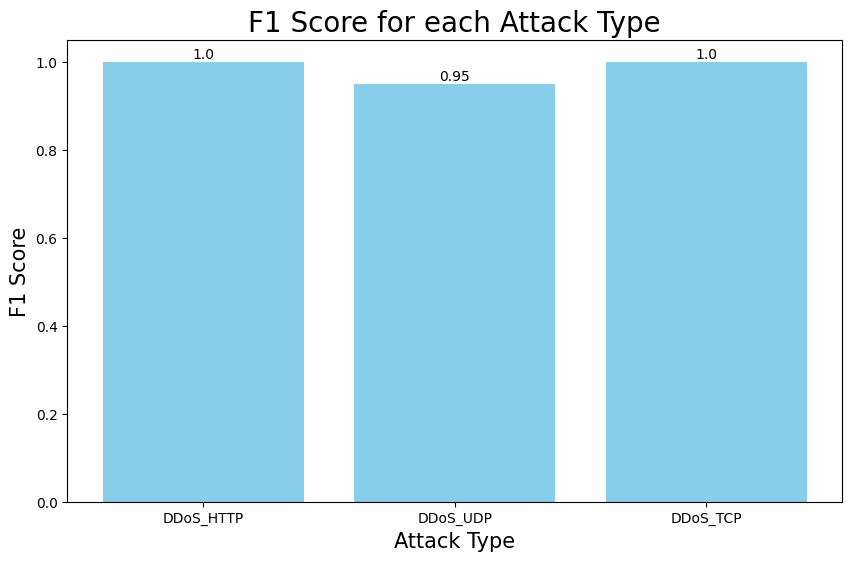

In [14]:
# get f1_score for each attack type
f1_scores = {}
for attack_type in attack_types:
    f1_scores[attack_type] = classification_report(y_true[attack_type], y_pred[attack_type], output_dict=True)['weighted avg']['f1-score']

# plot f1_score for each attack type
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.title('F1 Score for each Attack Type', fontsize=20)
plt.xlabel('Attack Type', fontsize=15)
plt.ylabel('F1 Score', fontsize=15)
for i in range(len(f1_scores)):
    plt.text(i, f1_scores[list(f1_scores.keys())[i]], round(f1_scores[list(f1_scores.keys())[i]], 2), ha = 'center', va = 'bottom')
plt.show()

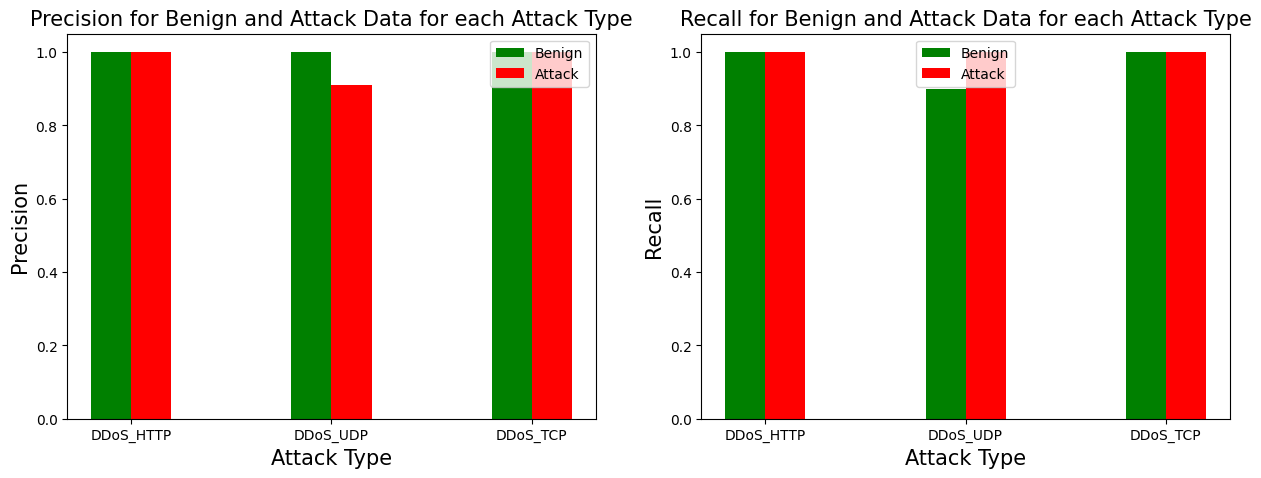

In [15]:
# get precision for benign data for each attack type
precision_benign = {}
precision_attack = {}
recall_benign = {}
recall_attack = {}
for attack_type in attack_types:
    precision_benign[attack_type] = classification_report(y_true[attack_type], y_pred[attack_type], output_dict=True)['BENIGN']['precision']
    precision_attack[attack_type] = classification_report(y_true[attack_type], y_pred[attack_type], output_dict=True)['ATTACK']['precision']
    recall_benign[attack_type] = classification_report(y_true[attack_type], y_pred[attack_type], output_dict=True)['BENIGN']['recall']
    recall_attack[attack_type] = classification_report(y_true[attack_type], y_pred[attack_type], output_dict=True)['ATTACK']['recall']


# Create 2 subplots for precision and recall for benign and attack data for each attack type
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# in subplot 1, plot precision for benign and attack data for each attack type
# bening columns should be green and attack columns should be red
# bars should be side by side for each attack type
# x-axis should be attack types with strings
bar_width = 0.2
x = np.arange(len(attack_types))
axs[0].bar(x - bar_width/2, precision_benign.values(), bar_width, color='green', label='Benign')
axs[0].bar(x + bar_width/2, precision_attack.values(), bar_width, color='red', label='Attack')
axs[0].set_title('Precision for Benign and Attack Data for each Attack Type', fontsize=15)
axs[0].set_xlabel('Attack Type', fontsize=15)
axs[0].set_ylabel('Precision', fontsize=15)
axs[0].set_xticks(x)
axs[0].set_xticklabels(attack_types)
axs[0].legend()

# in subplot 2, plot recall for benign and attack data for each attack type
# bening columns should be green and attack columns should be red
# bars should be side by side for each attack type
axs[1].bar(x - bar_width/2, recall_benign.values(), bar_width, color='green', label='Benign')
axs[1].bar(x + bar_width/2, recall_attack.values(), bar_width, color='red', label='Attack')
axs[1].set_title('Recall for Benign and Attack Data for each Attack Type', fontsize=15)
axs[1].set_xlabel('Attack Type', fontsize=15)
axs[1].set_ylabel('Recall', fontsize=15)
axs[1].set_xticks(x)
axs[1].set_xticklabels(attack_types)
axs[1].legend()

plt.show()

In [13]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
import tiktoken
import os
import dotenv
from sklearn.metrics import classification_report

dotenv.load_dotenv()
API_KEY = os.getenv("MY_OPENAI_API_KEY")
llm = ChatOpenAI(openai_api_key=API_KEY, temperature=0.0)
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

train_set_size = 25
test_set_size = 25

def generate(attack_type):
    messages = []
    system_prompt = ("system", f"You are intelligent log analyzer. User gives you samples of benign and attack iot network data. Analyze the samples and output a rule to identify attack data entry. The samples has following fields respectively {random_samples_ddos_dfs[attack_type].columns.tolist()}.")

    benign_samples = ""
    attack_samples = ""
    for i in range(train_set_size):
        benign_samples += str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist()) + ">>> BENIGN\n"
        attack_samples += str(random_samples_ddos_dfs[attack_type].iloc[i].values.tolist()) + ">>> ATTACK\n"
    user_prompt = ("user", "Sample logs are given below ```" + benign_samples + attack_samples + "```")
    messages.append(system_prompt)
    messages.append(user_prompt)

    # print("Messages:", messages)
    num_tokens = len(encoding.encode(str(messages)))
    print("Num tokens:", num_tokens)

    prompt = ChatPromptTemplate.from_messages(messages)
    chain = prompt | llm 

    return chain.invoke({"input": "Predict attack or benign: " + str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist())})


In [47]:
print(generate("DDoS_HTTP"))

Num tokens: 4395
content="Based on the provided samples, we can create a rule to identify attack data entries based on the following conditions:\n1. The protocol is 'tcp'.\n2. The destination port is '80'.\n3. The stddev value is greater than 0.5.\n\nRule to identify attack data entry:\n- If 'proto' is 'tcp' and 'dport' is '80' and 'stddev' > 0.5, then classify as ATTACK." response_metadata={'finish_reason': 'stop', 'logprobs': None}


In [37]:
y_true = []
y_pred = []
attack_type = "DDoS_HTTP"

print("Predicting benign samples...")
for i in range(100):
    y_true.append("BENIGN")
    row = random_samples_normal_dfs[attack_type].iloc[i]
    if row['proto'] == 'tcp' and row['dport'] == '80' and row['stddev'] > 0.3:
        y_pred.append("ATTACK")
    else:
        y_pred.append("BENIGN")

print("Predicting attack samples...")
for i in range(100):
    y_true.append("ATTACK")
    row = random_samples_ddos_dfs[attack_type].iloc[i]
    if row['proto'] == 'tcp' and row['dport'] == '80' and row['stddev'] > 0.3:
        y_pred.append("ATTACK")
    else:
        y_pred.append("BENIGN")

print(classification_report(y_true, y_pred))

Predicting benign samples...
Predicting attack samples...
              precision    recall  f1-score   support

      ATTACK       1.00      0.56      0.72       100
      BENIGN       0.69      1.00      0.82       100

    accuracy                           0.78       200
   macro avg       0.85      0.78      0.77       200
weighted avg       0.85      0.78      0.77       200



## Ollama

In [23]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
import tiktoken
from sklearn.metrics import classification_report

train_set_size = 25
test_set_size = 25

y_true = {}
y_pred = {}

def predict(attack_type, model):
    llm = ChatOllama(model=model, temperature=0)
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

    messages = []
    system_prompt = ("system", f"You are intelligent log analyzer. Output only the label ATTACK or BENIGN, nothing else by analyzing the labeled samples and predict the input is benign or attack. The samples has following fields respectively {random_samples_ddos_dfs[attack_type].columns.tolist()}.")

    benign_samples = ""
    attack_samples = ""
    for i in range(train_set_size):
        benign_samples += str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist()) + ">>> BENIGN\n"
        attack_samples += str(random_samples_ddos_dfs[attack_type].iloc[i].values.tolist()) + ">>> ATTACK\n"
    user_prompt = ("user", "Sample logs are given below ```" + benign_samples + attack_samples + "```")
    tt = str(random_samples_normal_dfs["DDoS_HTTP"].iloc[-1].values.tolist())
    example_prompt1 = ("user", f"Predict label for input: {tt}") 
    example_prompt2 = ("system", "BENIGN")
    yy = str(random_samples_ddos_dfs["DDoS_HTTP"].iloc[-1].values.tolist())
    example_prompt3 = ("user", f"Predict label for input: {yy}") 
    example_prompt4 = ("system", "ATTACK")
    messages.append(system_prompt)
    messages.append(user_prompt)
    messages.append(example_prompt1)
    messages.append(example_prompt2)
    messages.append(example_prompt3)
    messages.append(example_prompt4)
    messages.append(("user", "{input}"))

    # print("Messages:", messages)
    num_tokens = len(encoding.encode(str(messages)))
    print("Num tokens:", num_tokens)

    prompt = ChatPromptTemplate.from_messages(messages)
    chain = prompt | llm | StrOutputParser()

    y_true[attack_type] = []
    y_pred[attack_type] = []

    print("Predicting benign samples...")
    for i in range(train_set_size, train_set_size + test_set_size):
        
        y_true[attack_type].append("BENIGN")
        y_pred[attack_type].append(chain.invoke({"input": "Predict label for input: " + 
                                    str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist())}))
        print(i-train_set_size+1, end=" ")
        print(y_pred[attack_type][-1])

    print("\nPredicting attack samples...")
    for j in range(train_set_size, train_set_size + test_set_size):
        y_true[attack_type].append("ATTACK")
        y_pred[attack_type].append(chain.invoke({"input": "Predict label for input: " + 
                                    str(random_samples_ddos_dfs[attack_type].iloc[j].values.tolist())}))
        print(j-train_set_size+1, end=" ")
        print(y_pred[attack_type][-1])

    print(classification_report(y_true[attack_type], y_pred[attack_type]))

In [25]:
for attack_type in attack_types[:1]:
    print(f"Predicting for attack type: {attack_type}")
    predict(attack_type, "llama2:7b")

Predicting for attack type: DDoS_HTTP
Num tokens: 4509
Predicting benign samples...
1 BENIGN
2 BENIGN
3 BENIGN
4 The provided input is **BENIGN**.
5 BENIGN
6 BENIGN
7 BENIGN
8 BENIGN
9 BENIGN
10 BENIGN
11 The provided input is **BENIGN**.
12 BENIGN
13 BENIGN
14 BENIGN
15 BENIGN
16 The provided input is **BENIGN**.
17 The provided input is **BENIGN**.
18 BENIGN
19 The provided input is **BENIGN**.
20 BENIGN
21 BENIGN
22 The provided input is **BENIGN**.
23 BENIGN
24 The provided input is **BENIGN**.
25 BENIGN

Predicting attack samples...
1 BENIGN
2 The provided input is **BENIGN**.
3 BENIGN
4 BENIGN
5 BENIGN
6 BENIGN
7 BENIGN
8 BENIGN
9 BENIGN
10 The provided input is **BENIGN**.
11 BENIGN
12 BENIGN
13 BENIGN
14 BENIGN
15 BENIGN
16 BENIGN
17 BENIGN
18 The provided input is **BENIGN**.
19 BENIGN
20 BENIGN
21 BENIGN
22 BENIGN
23 BENIGN
24 BENIGN
25 BENIGN
                                   precision    recall  f1-score   support

                           ATTACK       0.00      0.00    

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_true[attack_type], y_pred[attack_type]))

                                                                                                                                                                                                                                                                                                                                                                                    precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                                                            ATTACK       0.00      0.00      0.00      25.0
                                                                                                                                                                               

In [27]:
# y_true["DDoS_HTTP"]
y_pred["DDoS_HTTP"]

['ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'BENIGN',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'BENIGN',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK',
 'ATTACK']